In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,LSTM

In [ ]:
#creating the dataset
N=1000
Tp=800
t=np.arange(0,N)
#formula to generate time series
x=np.sin(0.02*t)+2*np.random.rand(N)
df=pd.DataFrame(x)
df.head()

,0
0,0.281937
1,0.443471
2,1.952867
3,1.785650
4,0.594688


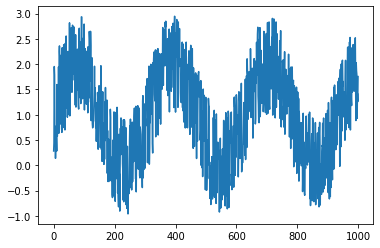

In [ ]:
plt.plot(df)

In [ ]:
#splitting
values=df.values
train,test=values[:Tp,:],values[Tp:,:]

In [ ]:
test

array([[ 0.2717043 ],
       [ 1.44756874],
       [-0.07562091],
       [-0.06780385],
       [ 1.32058742],
       [-0.3136592 ],
       [ 1.06259862],
       [ 0.79514334],
       [ 0.73221524],
       [ 0.62667482],
       [ 0.7557697 ],
       [ 0.03932307],
       [ 0.84192188],
       [-0.00927852],
       [ 0.3038191 ],
       [ 0.01833846],
       [ 0.83201087],
       [-0.52047468],
       [-0.2326769 ],
       [ 1.02812669],
       [ 0.21501167],
       [-0.20963959],
       [ 0.45543868],
       [-0.55516069],
       [-0.5941547 ],
       [-0.00405975],
       [ 0.02671643],
       [-0.06247852],
       [ 0.87704274],
       [ 0.97266251],
       [ 0.6417806 ],
       [ 0.2165651 ],
       [ 0.02756373],
       [ 0.00553668],
       [ 0.63958135],
       [ 0.61494896],
       [ 0.06615733],
       [ 1.00674091],
       [ 0.7123588 ],
       [ 0.12939362],
       [ 1.05092478],
       [-0.66016523],
       [ 0.2297433 ],
       [-0.79719197],
       [-0.34732249],
       [-0

In [ ]:
#RNN requires step size , i.e number of elements as input sequence
#for step 1
# i/p is 1.     o/p is 2
#for step 3
#i/p is 1,2,3   o/p is 4

In [ ]:
stepsize=4
#add step elements to train and test
test=np.append(test,np.repeat(test[-1],stepsize))
train=np.append(train,np.repeat(train[-1],stepsize))

In [ ]:
test

array([ 0.2717043 ,  1.44756874, -0.07562091, -0.06780385,  1.32058742,
       -0.3136592 ,  1.06259862,  0.79514334,  0.73221524,  0.62667482,
        0.7557697 ,  0.03932307,  0.84192188, -0.00927852,  0.3038191 ,
        0.01833846,  0.83201087, -0.52047468, -0.2326769 ,  1.02812669,
        0.21501167, -0.20963959,  0.45543868, -0.55516069, -0.5941547 ,
       -0.00405975,  0.02671643, -0.06247852,  0.87704274,  0.97266251,
        0.6417806 ,  0.2165651 ,  0.02756373,  0.00553668,  0.63958135,
        0.61494896,  0.06615733,  1.00674091,  0.7123588 ,  0.12939362,
        1.05092478, -0.66016523,  0.2297433 , -0.79719197, -0.34732249,
       -0.01576989,  0.42953109,  0.62474339,  0.58646157, -0.7004235 ,
        0.93499009,  0.86664908,  0.3781346 ,  0.45590326, -0.72051033,
       -0.54368545, -0.70970731,  0.21945588, -0.28206055,  0.84339451,
       -0.78026721, -0.38344753, -0.45787513,  0.30857781, -0.28992177,
        0.41191615,  0.63879628, -0.66032447, -0.26116965,  0.44

In [ ]:
#convert dataset into matrix
def convertToMatrix(data,step):
  X,Y=[],[]
  for i in range(len(data)-step):
    d=i+step
    X.append(data[i:d,])
    Y.append(data[d,])
  return np.array(X),np.array(Y)

trainX,trainY=convertToMatrix(train,stepsize)
testX,testY=convertToMatrix(test,stepsize)

In [ ]:
testX

array([[ 0.2717043 ,  1.44756874, -0.07562091, -0.06780385],
       [ 1.44756874, -0.07562091, -0.06780385,  1.32058742],
       [-0.07562091, -0.06780385,  1.32058742, -0.3136592 ],
       [-0.06780385,  1.32058742, -0.3136592 ,  1.06259862],
       [ 1.32058742, -0.3136592 ,  1.06259862,  0.79514334],
       [-0.3136592 ,  1.06259862,  0.79514334,  0.73221524],
       [ 1.06259862,  0.79514334,  0.73221524,  0.62667482],
       [ 0.79514334,  0.73221524,  0.62667482,  0.7557697 ],
       [ 0.73221524,  0.62667482,  0.7557697 ,  0.03932307],
       [ 0.62667482,  0.7557697 ,  0.03932307,  0.84192188],
       [ 0.7557697 ,  0.03932307,  0.84192188, -0.00927852],
       [ 0.03932307,  0.84192188, -0.00927852,  0.3038191 ],
       [ 0.84192188, -0.00927852,  0.3038191 ,  0.01833846],
       [-0.00927852,  0.3038191 ,  0.01833846,  0.83201087],
       [ 0.3038191 ,  0.01833846,  0.83201087, -0.52047468],
       [ 0.01833846,  0.83201087, -0.52047468, -0.2326769 ],
       [ 0.83201087, -0.

In [ ]:
#reshape testX and trainX to fit keras model as RNN requires 3-D input

In [ ]:
trainX=np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX=np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [ ]:
trainX.shape

(800, 1, 4)

In [ ]:
#Building the model
model=Sequential()
model.add(SimpleRNN(units=32,input_shape=(1,stepsize),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1184      
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fitting
model.fit(trainX,trainY,epochs=100,batch_size=16,verbose=2)

Epoch 1/100
50/50 - 1s - loss: 1.0347 - 1s/epoch - 24ms/step
Epoch 2/100
50/50 - 0s - loss: 0.4516 - 55ms/epoch - 1ms/step
Epoch 3/100
50/50 - 0s - loss: 0.4352 - 59ms/epoch - 1ms/step
Epoch 4/100
50/50 - 0s - loss: 0.4275 - 70ms/epoch - 1ms/step
Epoch 5/100
50/50 - 0s - loss: 0.4228 - 58ms/epoch - 1ms/step
Epoch 6/100
50/50 - 0s - loss: 0.4207 - 62ms/epoch - 1ms/step
Epoch 7/100
50/50 - 0s - loss: 0.4205 - 55ms/epoch - 1ms/step
Epoch 8/100
50/50 - 0s - loss: 0.4170 - 60ms/epoch - 1ms/step
Epoch 9/100
50/50 - 0s - loss: 0.4153 - 59ms/epoch - 1ms/step
Epoch 10/100
50/50 - 0s - loss: 0.4177 - 66ms/epoch - 1ms/step
Epoch 11/100
50/50 - 0s - loss: 0.4145 - 67ms/epoch - 1ms/step
Epoch 12/100
50/50 - 0s - loss: 0.4144 - 62ms/epoch - 1ms/step
Epoch 13/100
50/50 - 0s - loss: 0.4152 - 55ms/epoch - 1ms/step
Epoch 14/100
50/50 - 0s - loss: 0.4146 - 53ms/epoch - 1ms/step
Epoch 15/100
50/50 - 0s - loss: 0.4131 - 62ms/epoch - 1ms/step
Epoch 16/100
50/50 - 0s - loss: 0.4145 - 59ms/epoch - 1ms/step
Ep

In [ ]:
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)

7/7 [==============================] - 0s 3ms/step


In [ ]:
trainPredict

array([[ 1.0943558 ],
       [ 1.2219932 ],
       [ 1.0449907 ],
       [ 0.68290126],
       [ 0.4117245 ],
       [ 0.7576614 ],
       [ 0.62887233],
       [ 0.6085987 ],
       [ 0.9382137 ],
       [ 1.1735163 ],
       [ 1.071309  ],
       [ 1.1713005 ],
       [ 1.0249636 ],
       [ 1.3616729 ],
       [ 1.4358805 ],
       [ 1.496201  ],
       [ 1.7433304 ],
       [ 1.4851397 ],
       [ 1.8154936 ],
       [ 1.5407888 ],
       [ 1.3721621 ],
       [ 1.4249929 ],
       [ 1.4601212 ],
       [ 1.3681929 ],
       [ 1.2103039 ],
       [ 1.4089292 ],
       [ 1.558119  ],
       [ 1.5896559 ],
       [ 1.627684  ],
       [ 1.337477  ],
       [ 1.5415503 ],
       [ 1.5054512 ],
       [ 1.6977551 ],
       [ 1.652689  ],
       [ 1.2666034 ],
       [ 1.6012542 ],
       [ 1.773462  ],
       [ 1.6516368 ],
       [ 1.8900176 ],
       [ 1.6848075 ],
       [ 1.6547883 ],
       [ 1.649682  ],
       [ 1.3477395 ],
       [ 1.3212404 ],
       [ 1.477524  ],
       [ 1

In [ ]:
predicted=np.concatenate((trainPredict,testPredict),axis=0)

In [ ]:
#check the loss
trainScore=model.evaluate(trainX,trainY,verbose=0)
print(trainScore)

0.3784668743610382
